# Time Series Clustering Example

## Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans

## Load Data

In [ ]:
df = pd.read_csv('ts_example.csv', index_col=0)
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
i0,14,28,37,47,60,61,77
i1,12,28,35,41,51,64,73
i2,12,22,37,50,52,69,76
i3,19,28,36,45,58,65,75
i4,12,24,35,42,50,60,72


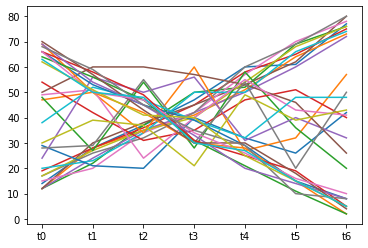

In [ ]:
plt.plot(df.T)
plt.show()

눈으로는 증가하는 라인, 감소하는 라인, 불규칙 라인으로 구별이 된다.

## Preprocessing

일단, 값들을 정규화 해주어야 한다.

알고 있겠지만 정규화를 해주지 않으면 이상한 결과가 나온다.

In [ ]:
avg_list = []
std_list = []

for idx, row in df.iterrows():
    avg_list.append(row.mean())
    std_list.append(row.std())

In [ ]:
df['avg'] = avg_list
df['std'] = std_list
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
i0,14,28,37,47,60,61,77,46.285714,21.646511
i1,12,28,35,41,51,64,73,43.428571,21.046434
i2,12,22,37,50,52,69,76,45.428571,23.422618
i3,19,28,36,45,58,65,75,46.571429,20.403081
i4,12,24,35,42,50,60,72,42.142857,20.659369


In [ ]:
for i in range(len(df)):
    for j in range(0, 7):
        df.iloc[i, j] = (df.iloc[i, j] - df.iloc[i, 7]) / df.iloc[i, 8]
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
i0,-1.491497,-0.844742,-0.428970,0.032998,0.633556,0.679753,1.418902,46.285714,21.646511
i1,-1.493297,-0.733073,-0.400475,-0.115391,0.359749,0.977431,1.405056,43.428571,21.046434
i2,-1.427192,-1.000254,-0.359848,0.195172,0.280559,1.006353,1.305210,45.428571,23.422618
i3,-1.351337,-0.910227,-0.518129,-0.077019,0.560139,0.903225,1.393347,46.571429,20.403081
i4,-1.459041,-0.878190,-0.345744,-0.006915,0.380319,0.864361,1.445211,42.142857,20.659369


In [ ]:
df = df.drop(['avg', 'std'], axis=1)
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
i0,-1.491497,-0.844742,-0.428970,0.032998,0.633556,0.679753,1.418902
i1,-1.493297,-0.733073,-0.400475,-0.115391,0.359749,0.977431,1.405056
i2,-1.427192,-1.000254,-0.359848,0.195172,0.280559,1.006353,1.305210
i3,-1.351337,-0.910227,-0.518129,-0.077019,0.560139,0.903225,1.393347
i4,-1.459041,-0.878190,-0.345744,-0.006915,0.380319,0.864361,1.445211


## Model1: Euclidean

In [ ]:
model = TimeSeriesKMeans(n_clusters=3, metric='euclidean', random_state=119)

In [ ]:
result = model.fit_predict(df)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
df['clst'] = result
df.head()

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
i0,-1.491497,-0.844742,-0.428970,0.032998,0.633556,0.679753,1.418902,0
i1,-1.493297,-0.733073,-0.400475,-0.115391,0.359749,0.977431,1.405056,0
i2,-1.427192,-1.000254,-0.359848,0.195172,0.280559,1.006353,1.305210,0
i3,-1.351337,-0.910227,-0.518129,-0.077019,0.560139,0.903225,1.393347,0
i4,-1.459041,-0.878190,-0.345744,-0.006915,0.380319,0.864361,1.445211,0


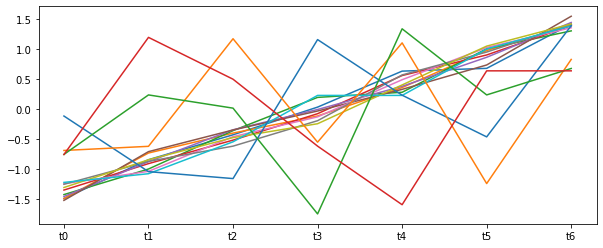

In [ ]:
clst0 = df[df['clst']==0]
clst0.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

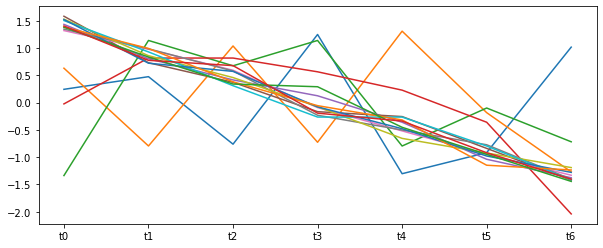

In [ ]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

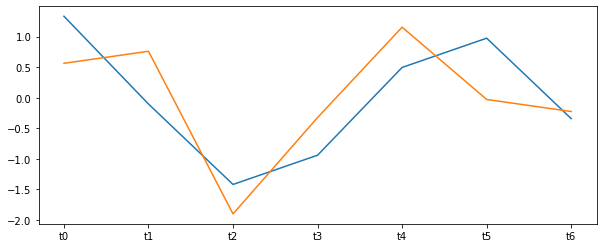

In [ ]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()

## Model2: DTW

In [ ]:
model2 = TimeSeriesKMeans(n_clusters=3, metric='dtw', random_state=119)

In [ ]:
result2 = model2.fit_predict(df)
result2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
df['clst'] = result2
df.head()

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
i0,-1.491497,-0.844742,-0.428970,0.032998,0.633556,0.679753,1.418902,0
i1,-1.493297,-0.733073,-0.400475,-0.115391,0.359749,0.977431,1.405056,0
i2,-1.427192,-1.000254,-0.359848,0.195172,0.280559,1.006353,1.305210,0
i3,-1.351337,-0.910227,-0.518129,-0.077019,0.560139,0.903225,1.393347,0
i4,-1.459041,-0.878190,-0.345744,-0.006915,0.380319,0.864361,1.445211,0


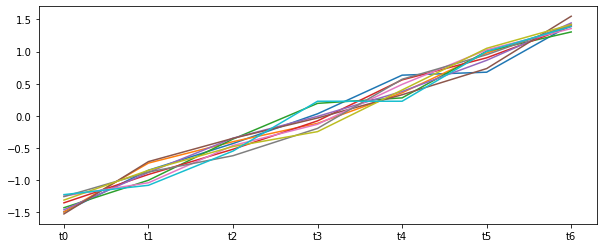

In [ ]:
clst0 = df[df['clst']==0]
clst0.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

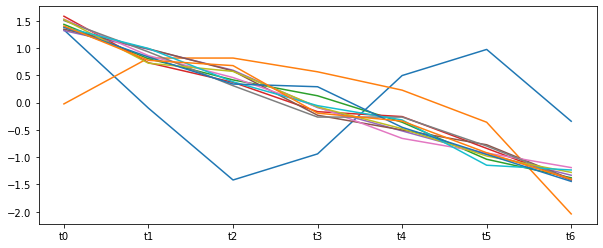

In [ ]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

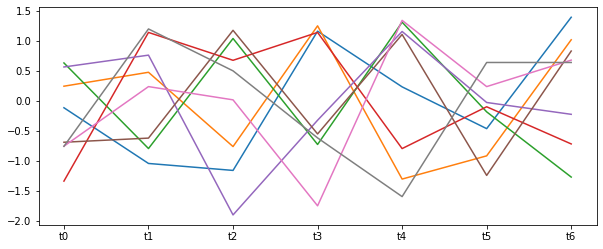

In [ ]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()

euclidean과 dtw를 이용한 Time Series Clustering의 간단한 예시를 보았다.

결과적으론, dtw를 이용한 것이 더 잘 분류함을 확인할 수 있었다.

물론 실제 시계열 데이터는 예시 데이터와는 다르게 매우 복잡하여, 이러한 방법이 잘 먹히지 않는다.